#### 1. Implement the Monte Carlo simulation method (dart throw) for estimating the value of \pi. You must plot a graph with N \in {10, 100, 1000, 10k, 100k, 1m} on the X-axis and the estimated value of \pi on the Y-axis.


Pi values: [3.2, 2.96, 3.168, 3.1656, 3.14436, 3.143128]


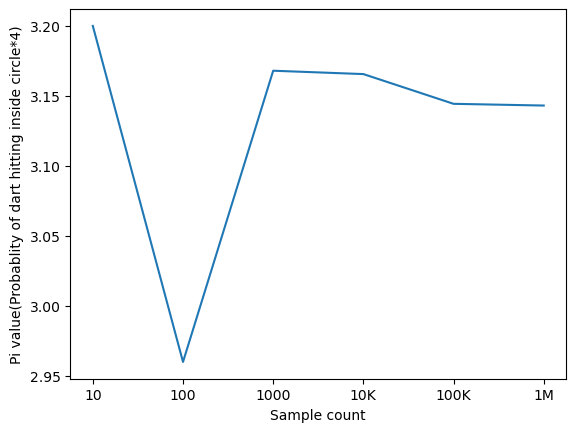

In [31]:
import random
from math import dist
import matplotlib.pyplot as plt

radius = 20
start = 0
end = radius*2
sample_count = 10

x_axis = [1,2,3,4,5,6]
pi = []

for i in range(6):
    x = [random.uniform(start,end) for i in range(sample_count)]
    y = [random.uniform(start,end) for i in range(sample_count)]

    circle = 0
    for i in range(sample_count):
        distance = dist((x[i],y[i]),(radius,radius))
        if(distance<radius):
            circle+=1

    Prob_A = circle/sample_count
    pi_value = Prob_A*4
    pi.append(pi_value)
    sample_count*=10

print("Pi values:", pi)  
plt.plot(x_axis, pi)
plt.xlabel("Sample count")
plt.ylabel("Pi value(Probablity of dart hitting inside circle*4)")
plt.xticks(x_axis, [10, 100, 1000, "10K", "100K", "1M"])
plt.show()

As the sample count increases the value of PI nears close to the real value of the PI.

#### 2. Implement the multinomial Naive Bayesian classifier algorithm for classifying the language of an incoming text. Build a model by computing the conditional distribution P(X_i|L_i) from the training data. X_i is the feature (unique word), and L_i is the language (choose 5 languages). You should also estimate the priors P(L_i) from the training data. Given a test data X_test, you must compute P(L_i|X_test) = P(L_i) \prod_j P(x_j|L_i) using the log-sum hack.

In [64]:
import numpy as np
import math

def multinomialNaiveBayseianAlgorithm(training_data, test_data):
    lang_len = len(training_data)
    unique_words = np.array([])
    for lang in training_data:
        for word in lang.split():
            if word not in unique_words:
                unique_words = np.append(unique_words,word)
    print("words_by_uniq:",unique_words)
    uniqueWords_len = np.size(unique_words)
    hot_encoded_trainingData = np.empty((uniqueWords_len, lang_len))
    
    
    for i,word in enumerate(unique_words):
        word_count_eachLanguage = np.array([])
        for lang in training_data:
            word_count_eachLanguage = np.append(word_count_eachLanguage, lang.count(word))
        hot_encoded_trainingData[i] = word_count_eachLanguage
    print("\nHot encoded training data:")
    print(hot_encoded_trainingData)
    
    condprob_table = np.empty((uniqueWords_len, lang_len))
    sum_lang = hot_encoded_trainingData.sum(axis=0)
    print("\nsum_col_wise:",sum_lang)
    
    for c,uniq_word in enumerate(hot_encoded_trainingData):
        condprob_word = np.array([])
        for i in range(lang_len):
            condprob_word = np.append(condprob_word, round((uniq_word[i]/sum_lang[i]), 2))
        condprob_table[c] = condprob_word
    print("\nConditional Probability table:")
    print(condprob_table)
    
    posteriors = np.array([])
    prior_lang = 1/lang_len
    for i in range(lang_len):
        condProb_xi_given_y = 0
        for data in test_data.split():
            if data in unique_words:
                data_index = np.where(unique_words==data)[0][0]
                xi_y = condprob_table[data_index][i]
                if(xi_y!=0):
                    condProb_xi_given_y += math.log(condprob_table[data_index][i],10)
        condProb_xi_given_y*=(-1)
        posterior_eachLang = prior_lang*condProb_xi_given_y
        posteriors = np.append(posteriors, posterior_eachLang)
    print("\nPosteriors:", posteriors)
    return posteriors.argmax(axis=0)
    
#            Language 1            Language 2      Language 3     Language 4
training = ["what is your name ", "naam kya hai", "peyar enna", "meeru name yemi"]
test = "what is the pen name"

print("\nTest data belongs to Language",multinomialNaiveBayseianAlgorithm(training, test)+1)

words_by_uniq: ['what' 'is' 'your' 'name' 'naam' 'kya' 'hai' 'peyar' 'enna' 'meeru'
 'yemi']

Hot encoded training data:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

sum_col_wise: [4. 3. 2. 3.]

Conditional Probability table:
[[0.25 0.   0.   0.  ]
 [0.25 0.   0.   0.  ]
 [0.25 0.   0.   0.  ]
 [0.25 0.   0.   0.33]
 [0.   0.33 0.   0.  ]
 [0.   0.33 0.   0.  ]
 [0.   0.33 0.   0.  ]
 [0.   0.   0.5  0.  ]
 [0.   0.   0.5  0.  ]
 [0.   0.   0.   0.33]
 [0.   0.   0.   0.33]]

Posteriors: [0.45154499 0.         0.         0.12037152]

Test data belongs to Language 1


C:\Users\keerthivasan.s\AppData\Local\Temp\ipykernel_10988\761268519.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if word not in unique_words:


In [38]:
import numpy as np
from sklearn import naive_bayes

#[["what is brother name"],["naam kya hai beta"],["unnoda peyar enna thambi"],["meeru name yemi tambudu"]]
x_train = np.array([[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,1,1,1]])
y_train = np.array([0,1,2,3])

#["what","is","brother","pen"]
x_test = np.array([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]])
print(x_test.dtype)

reg = naive_bayes.BernoulliNB()
reg.fit(x_train, y_train)
predict = reg.predict(x_test)
predict


int32


array([0])

In [65]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.74it/s]

[LightGBM] [Info] Number of positive: 254, number of negative: 144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3976
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638191 -> initscore=0.567521
[LightGBM] [Info] Start training from score 0.567521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.99,0.99,0.99,0.99,0.03
SGDClassifier,0.99,0.99,0.99,0.99,0.02
LinearSVC,0.99,0.99,0.99,0.99,0.01
Perceptron,0.99,0.99,0.99,0.99,0.02
SVC,0.98,0.98,0.98,0.98,0.02
RandomForestClassifier,0.98,0.98,0.98,0.98,0.38
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.16
RidgeClassifier,0.98,0.98,0.98,0.98,0.03
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.02
